In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [3]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [4]:
#first two classes positive, last one negative
x_pos=iris.data[0:100]
x_neg=iris.data[100:150]
x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 4)
y_train = np.concatenate((np.ones(100), np.zeros(50))).reshape(-1, 1).astype(int)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Bloom Filter

In [6]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = classifier.predict(x_train)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [13]:
prob=classifier.predict_proba(x_train)
print(prob[:,1])

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.99999998e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999998e-01 1.00000000e+00 9.99999998e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.85615372e-01 9.74525750e-01
 9.17984947e-01 9.77779899e-01 9.09777500e-01 9.73109777e-01
 9.14444949e-01 9.99753925e-01 9.85663763e-01 9.84831665e-01
 9.98690940e-01 9.76548786e-01 9.98111206e-01 9.37583809e-01
 9.98920411e-01 9.913252

In [14]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  0.98


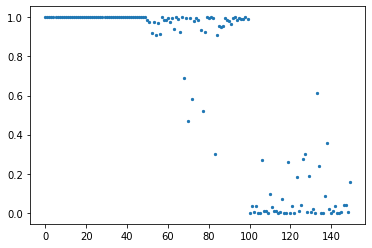

In [15]:
preds =prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [21]:
m=30

In [22]:
bf=BloomFilter(m,classifier)

In [23]:
bf.add_init(x_train,y_train)

In [24]:
print(fpr_test(x_train,bf,y_train))

2
48
0.04


In [25]:
import pickle
import os

In [27]:
filename1='logreg_iris.sav'
pickle.dump(classifier,open(filename1,'wb'))

In [28]:
model_size1=os.stat('logreg_iris.sav').st_size

In [29]:
print(model_size1)

856


# SVM Model

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [8]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
predic=clf2.predict(x_train)

In [10]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[9.91319057e-01 9.93450948e-01 9.88808620e-01 9.89277563e-01
 9.88278510e-01 9.90943494e-01 9.86470396e-01 9.92353540e-01
 9.84003838e-01 9.92278335e-01 9.91179647e-01 9.90307386e-01
 9.90585909e-01 9.75206153e-01 9.83337196e-01 9.75200320e-01
 9.88369325e-01 9.92747634e-01 9.93232462e-01 9.87679817e-01
 9.96300599e-01 9.91165034e-01 9.75169173e-01 9.99981002e-01
 9.92016197e-01 9.95485153e-01 9.95135259e-01 9.92948829e-01
 9.93560378e-01 9.91059934e-01 9.93170080e-01 9.97098492e-01
 9.76970488e-01 9.78951826e-01 9.93777180e-01 9.92193121e-01
 9.93447347e-01 9.84463853e-01 9.83074760e-01 9.93363397e-01
 9.90902209e-01 9.75166625e-01 9.81510317e-01 9.95248812e-01
 9.91219998e-01 9.93454236e-01 9.86661612e-01 9.87685268e-01
 9.90430853e-01 9.92814869e-01 9.75219689e-01 9.85233884e-01
 8.97614799e-01 9.72797034e-01 9.32786380e-01 9.85713759e-01
 9.45338103e-01 9.91313025e-01 9.92826515e-01 9.75164517e-01
 9.75164506e-01 9.87882950e-01 9.95777889e-01 9.68719515e-01
 9.99995483e-01 9.938680

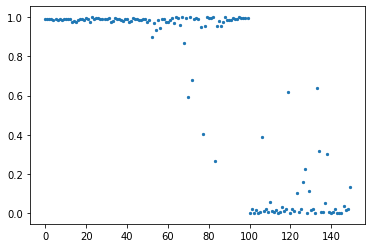

In [11]:
prob=probability[:,1]
plt.scatter(np.arange(len(prob)), prob, s=5)

In [12]:
accuracy = accuracy_score(y_train.flatten(),predic)
print(accuracy)

0.9733333333333334


In [13]:
m=30
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [14]:
print(fpr_test(x_train,bf,y_train))

2
48
0.04


In [38]:
preds

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999998e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999998e-01, 1.00000000e+00, 9.99999998e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.85615372e-01, 9.74525750e-01,
       9.17984947e-01, 9.77779899e-01, 9.09777500e-01, 9.73109777e-01,
      

In [39]:
filename2='svm_iris.sav'
pickle.dump(clf2,open(filename2,'wb'))

In [40]:
model_size2=os.stat('svm_iris.sav').st_size

In [41]:
print(model_size2)

3702
